In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import RDKFingerprint
from rdkit.Chem import rdMolDescriptors

In [2]:
def smiles_encoder( smiles, maxlen=120 ):
    X = np.zeros( ( maxlen, len( SMILES_CHARS ) ) )
    for i, c in enumerate( smiles ):
        X[i, smi2index[c] ] = 1
    return X

def smiles_decoder( X ):
    smi = ''
    X = X.argmax( axis=-1 )
    for i in X:
        smi += index2smi[ i ]
    return smi

# coverting rdkit object to networkx object   
def mol_to_nx(mol):
    G = nx.Graph()

    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(),
                   atomic_num=atom.GetAtomicNum(),
                   is_aromatic=atom.GetIsAromatic(),
                   atom_symbol=atom.GetSymbol())
        
    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(),
                   bond.GetEndAtomIdx(),
                   bond_type=bond.GetBondType())
        
    return G

# covert rdkit object to networkx object    
def mol_to_nx(mol):
    G = nx.Graph()

    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(),
                   atomic_num=atom.GetAtomicNum(),
                   is_aromatic=atom.GetIsAromatic(),
                   atom_symbol=atom.GetSymbol())
        
    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(),
                   bond.GetEndAtomIdx(),
                   bond_type=bond.GetBondType())
        
    return G

In [3]:
# define the smiles string and covert it into a molecule sturcture
caffeine_smiles = 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'

mol = Chem.MolFromSmiles(caffeine_smiles)

# draw the modecule
p1 = Draw.MolToImage(mol)

# draw the molecule with property
for i, atom in enumerate(mol.GetAtoms()):
    atom.SetProp("molAtomMapNumber", str(atom.GetIdx()))
    
p2 = Draw.MolToImage(mol)

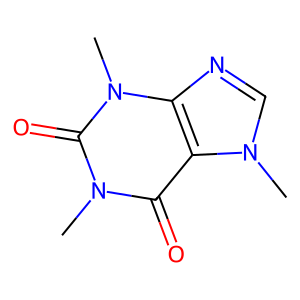

In [4]:
p1

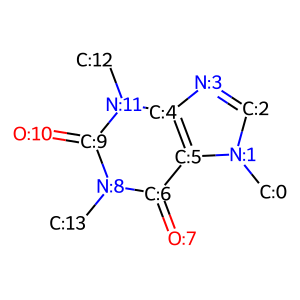

In [5]:
p2

In [6]:
# print the atoms of the molecule
id1, atnum, arom, sym = ([] for i in range(4))
atid1, atid2, btype = ([] for i in range(3))

for atom in mol.GetAtoms():
    id1.append(atom.GetIdx())
    atnum.append(atom.GetAtomicNum())
    arom.append(atom.GetIsAromatic())
    sym.append(atom.GetSymbol())

df1 = pd.DataFrame({'ID': id1,
    'Atom #': atnum,
    'Aromtic': arom,
    'Symbool': sym})

# print the bonds of the molecule
for bond in mol.GetBonds():
    atid1.append(bond.GetBeginAtomIdx())
    atid2.append(bond.GetEndAtomIdx())
    btype.append(str(bond.GetBondType()).strip("rdkit"))

df2 = pd.DataFrame({'Begin ID': atid1,
    'End ID': atid2,
    'Bond Type': btype})

In [7]:
df1

,ID,Atom #,Aromtic,Symbool
0,0,6,False,C
1,1,7,True,N
2,2,6,True,C
3,3,7,True,N
4,4,6,True,C
5,5,6,True,C
6,6,6,True,C
7,7,8,False,O
8,8,7,True,N
9,9,6,True,C


# 

In [8]:
df2

,Begin ID,End ID,Bond Type
0,0,1,SINGLE
1,1,2,AROMATIC
2,2,3,AROMATIC
3,3,4,AROMATIC
4,4,5,AROMATIC
5,5,6,AROMATIC
6,6,7,DOUBLE
7,6,8,AROMATIC
8,8,9,AROMATIC
9,9,10,DOUBLE


In [9]:
# retrieving RDK Fingerprint
fingerprint_rdk = RDKFingerprint(mol)
print(">>> RDK Fingerprint = ", fingerprint_rdk)

fingerprint_rdk_np = np.array(fingerprint_rdk)
print(">>> RDK Fingerprint in numpy = ", fingerprint_rdk_np)
print(">>> RDK Fingerprint in numpy shape = ", fingerprint_rdk_np.shape)

print()

# retrieving Morgan Fingerprint
fingerprint_morgan = rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, radius=2)
print(">>> Morgan Fingerprint = ", fingerprint_morgan)

fingerprint_morgan_np = np.array(fingerprint_morgan)
print(">>> Morgan Fingerprint in numpy : ", fingerprint_morgan_np)
print(">>> Morgan Fingerprint in numpy shape = ", fingerprint_morgan_np.shape)


>>> RDK Fingerprint =  <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x7fc4f2f41720>
>>> RDK Fingerprint in numpy =  [1 1 0 ... 0 0 1]
>>> RDK Fingerprint in numpy shape =  (2048,)

>>> Morgan Fingerprint =  <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x7fc4f2f41cc0>
>>> Morgan Fingerprint in numpy :  [0 0 0 ... 0 0 0]
>>> Morgan Fingerprint in numpy shape =  (2048,)


In [10]:
# define SMILES characters
SMILES_CHARS = [' ',
                '#', '%', '(', ')', '+', '-', '.', '/',
                '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
                '=', '@',
                'A', 'B', 'C', 'F', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P',
                'R', 'S', 'T', 'V', 'X', 'Z',
                '[', '\\', ']',
                'a', 'b', 'c', 'e', 'g', 'i', 'l', 'n', 'o', 'p', 'r', 's',
                't', 'u']
                
# define encoder and decoder
smi2index = dict( (c,i) for i,c in enumerate( SMILES_CHARS ) )
index2smi = dict( (i,c) for i,c in enumerate( SMILES_CHARS ) )


caffeine_encoding = smiles_encoder(caffeine_smiles)
print(caffeine_encoding.shape) # (120, 56)

(120, 56)


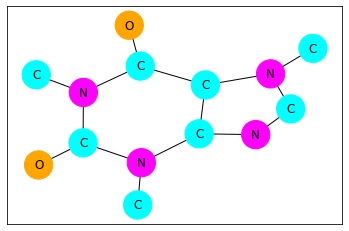

In [13]:
# define the smiles string and covert it into a molecule sturcture ------------
caffeine_smiles = 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'
caffeine_mol = Chem.MolFromSmiles(caffeine_smiles)

# conver rdkit object to networkx object --------------------------------------
caffeine_nx = mol_to_nx(caffeine_mol)

caffeine_atom = nx.get_node_attributes(caffeine_nx, 'atom_symbol')

color_map = {'C': 'cyan',
             'O': 'orange',
             'N': 'magenta'}  

caffeine_colors = []
for idx in caffeine_nx.nodes():
    if (caffeine_nx.nodes[idx]['atom_symbol'] in color_map):
        caffeine_colors.append(color_map[caffeine_nx.nodes[idx]['atom_symbol']])
    else:
        caffeine_colors.append('gray')
    
nx.draw_networkx(caffeine_nx,
        labels=caffeine_atom,
        with_labels=True,
        node_color=caffeine_colors,
        node_size=800)

plt.show()

# print out the adjacency matrix
#matrix = nx.to_numpy_matrix(caffeine_nx)
#print(matrix)